In [55]:
import json
from os import path

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

import warnings
warnings.filterwarnings('ignore')

In [56]:
path_root = '.'
path_dataset = path.join(path_root, 'dataset')
path_csv = path.join(path_dataset, 'csv')

In [57]:
def load_json(path):
    with open(path, encoding='utf-8') as f:
        return json.load(f)

In [58]:
# read decodings
decodings = load_json(path.join(path_dataset, 'decodings.json'))

# read csv
df = pd.read_csv(path.join(path_csv, 'data.csv'), dtype=str, encoding='utf8')

# replace labels
df.replace(decodings['values'], inplace=True)

# fix types
df = df.astype({'age': int, 'weight': int, 'height': int, 'employment_duration': float})

# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  322 non-null    int64  
 1   height               322 non-null    int64  
 2   weight               322 non-null    int64  
 3   gender               322 non-null    object 
 4   smoking              322 non-null    object 
 5   drinking             322 non-null    object 
 6   exercise             322 non-null    object 
 7   married              322 non-null    object 
 8   children             322 non-null    object 
 9   student              322 non-null    object 
 10  employed             322 non-null    object 
 11  employment_duration  322 non-null    float64
dtypes: float64(1), int64(3), object(8)
memory usage: 30.3+ KB


In [59]:
df.head()

,age,height,weight,gender,smoking,drinking,exercise,married,children,student,employed,employment_duration
0,36,175,82,Male,No,weekly,1-2/week,No,No,No,Remote,12.000
1,22,178,77,Male,No,monthly,1-2/week,No,No,Yes,Unemployed,0.000
2,32,174,65,Male,No,monthly,1-2/week,No,No,Yes,On-site,0.038
3,21,156,65,Female,No,Never,3-4/week,No,No,Yes,Unemployed,0.000
4,24,176,94,Male,No,Rare,1-2/week,No,No,Yes,Unemployed,0.000


In [60]:
df.shape

(322, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  322 non-null    int64  
 1   height               322 non-null    int64  
 2   weight               322 non-null    int64  
 3   gender               322 non-null    object 
 4   smoking              322 non-null    object 
 5   drinking             322 non-null    object 
 6   exercise             322 non-null    object 
 7   married              322 non-null    object 
 8   children             322 non-null    object 
 9   student              322 non-null    object 
 10  employed             322 non-null    object 
 11  employment_duration  322 non-null    float64
dtypes: float64(1), int64(3), object(8)
memory usage: 30.3+ KB


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,322.0,25.338509,7.585874,12.0,21.00,22.0,28.00,56.0
height,322.0,174.214286,9.845253,143.0,168.00,175.0,180.75,218.0
weight,322.0,72.270186,15.462093,30.0,62.25,70.5,81.75,160.0
employment_duration,322.0,3.301255,6.621366,0.0,0.00,0.0,2.00,30.0


In [63]:
df["weight"].value_counts()[0:15]

65    22
80    14
68    13
70    13
75    13
90    12
77    11
82    11
60     9
72     9
73     8
58     8
67     8
66     7
63     7
Name: weight, dtype: int64

In [64]:
df.groupby(['gender'])["smoking"].value_counts()

gender  smoking
Female  No          78
        Yes          9
Male    No         168
        Yes         67
Name: smoking, dtype: int64

In [65]:
df["gender"].value_counts()

Male      235
Female     87
Name: gender, dtype: int64

In [66]:
df.groupby(['gender'])["employed"].value_counts()

gender  employed  
Female  Unemployed     50
        Remote         23
        On-site        14
Male    Unemployed    138
        Remote         66
        On-site        31
Name: employed, dtype: int64

<AxesSubplot:>

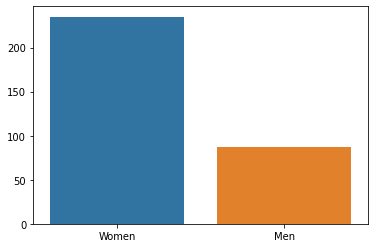

In [67]:
x = ["Women" , 'Men']
y = [df["gender"].value_counts()[0], df["gender"].value_counts()[1]]

sns.barplot(x= x, y=y)

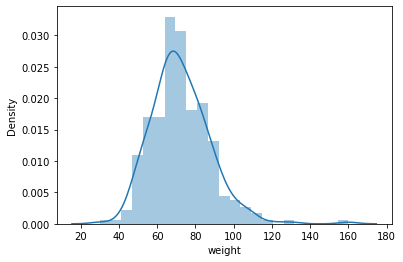

In [68]:
sns.distplot(df.weight);

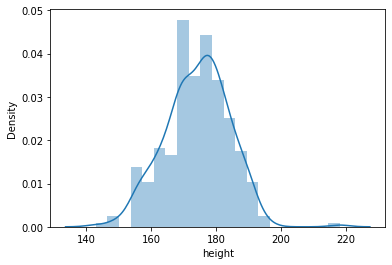

In [69]:
sns.distplot(df.height);

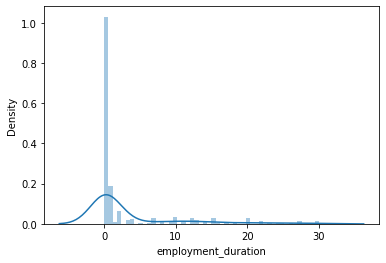

In [70]:
sns.distplot(df.employment_duration);

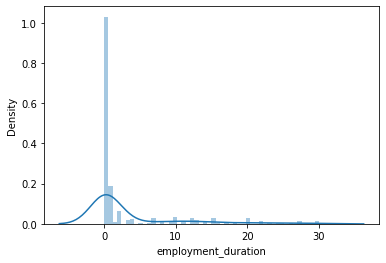

In [71]:
sns.distplot(df.employment_duration);

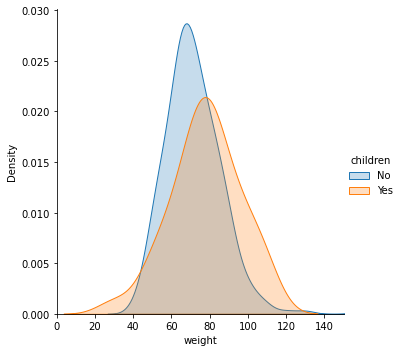

In [72]:
(sns
 .FacetGrid(df,
              hue = "children",
              height = 5,
              xlim = (0, 150))
 .map(sns.kdeplot, "weight", shade= True)
 .add_legend()
);

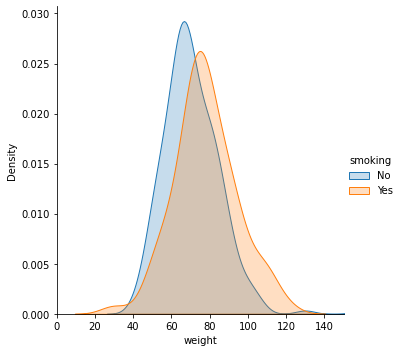

In [73]:
(sns
 .FacetGrid(df,
              hue = "smoking",
              height = 5,
              xlim = (0, 150))
 .map(sns.kdeplot, "weight", shade= True)
 .add_legend()
);

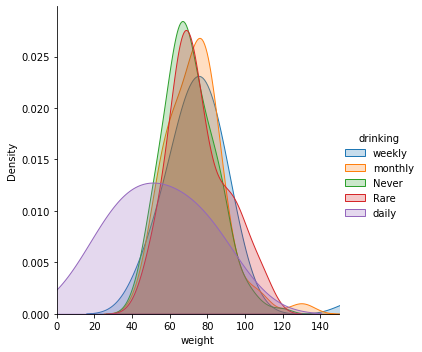

In [74]:
(sns
 .FacetGrid(df,
              hue = "drinking",
              height = 5,
              xlim = (0, 150))
 .map(sns.kdeplot, "weight", shade= True)
 .add_legend()
);

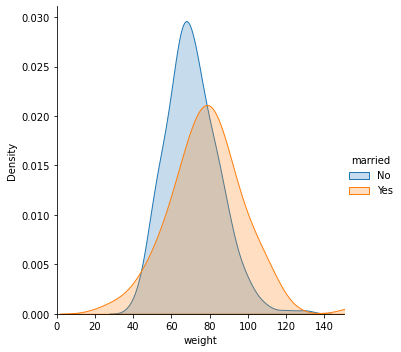

In [75]:
(sns
 .FacetGrid(df,
              hue = "married",
              height = 5,
              xlim = (0, 150))
 .map(sns.kdeplot, "weight", shade= True)
 .add_legend()
);

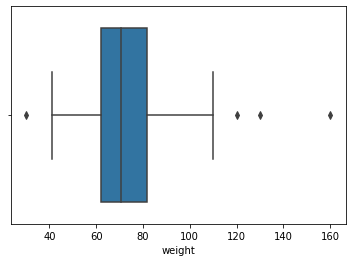

In [76]:
sns.boxplot(x = df["weight"]);

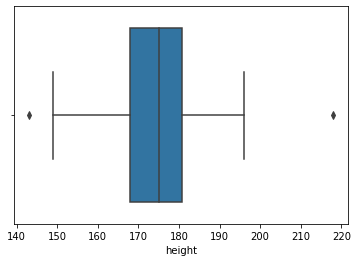

In [77]:
sns.boxplot(x = df["height"]);

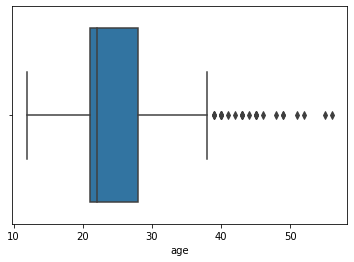

In [78]:
sns.boxplot(x = df["age"]);

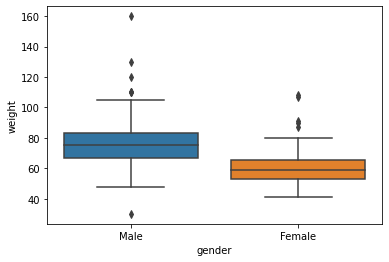

In [79]:
sns.boxplot(x = "gender", y = "weight", data = df);

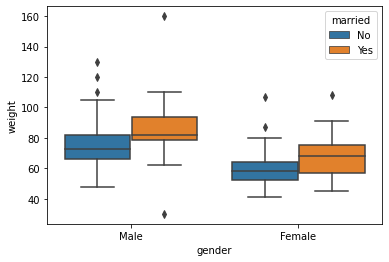

In [80]:
sns.boxplot(x = "gender", y = "weight", hue = "married", data = df);

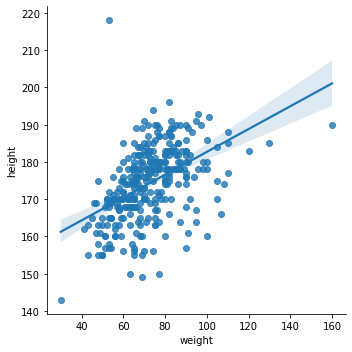

In [81]:
sns.lmplot(x = "weight", y = "height", data = df);

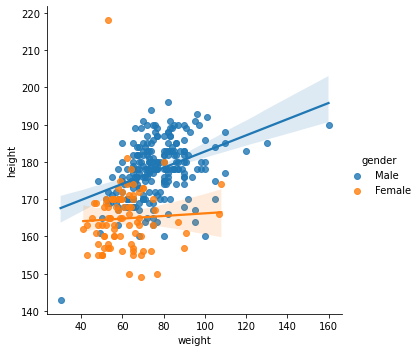

In [82]:
sns.lmplot(x = "weight", y = "height", hue = "gender", data = df);

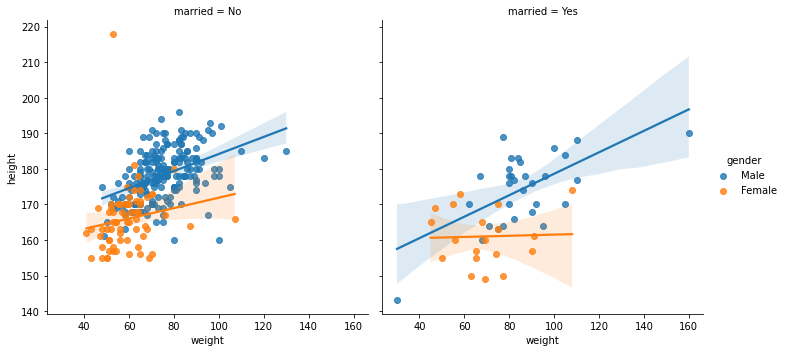

In [83]:
sns.lmplot(x = "weight", y = "height", hue = "gender", col ='married', data = df);

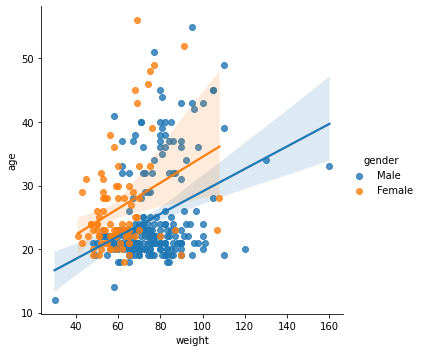

In [84]:
sns.lmplot(x = "weight", y = "age", hue = "gender", data = df);

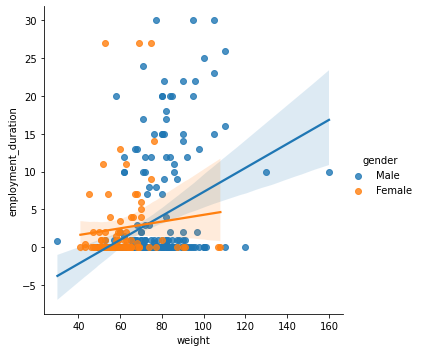

In [85]:
sns.lmplot(x = "weight", y = "employment_duration", hue = "gender", data = df);

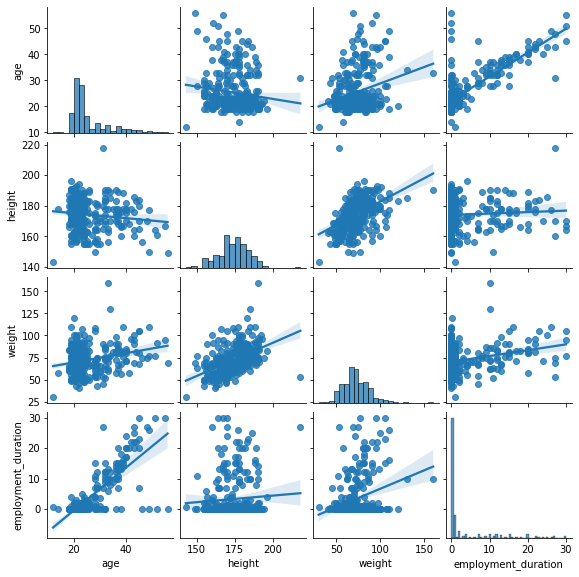

In [86]:
g = sns.pairplot(df[["age","height","weight","employment_duration"]], kind = "reg")
g.fig.set_size_inches(8,8)

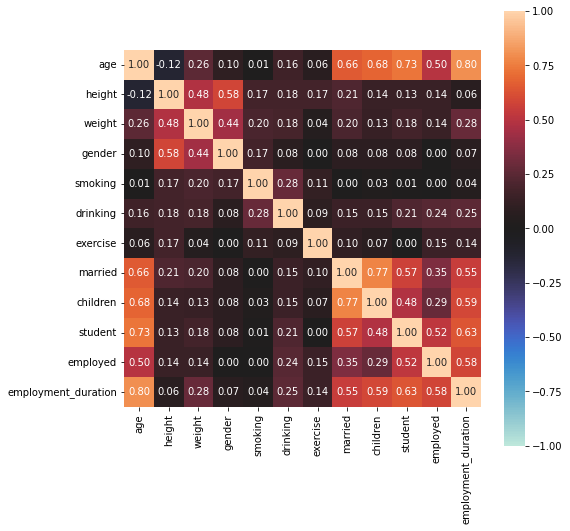

In [87]:
corr = associations(df, figsize=(8,8))